# 데이터 불러오기

In [ ]:
!pip install pandas-profiling==3.1.0
!pip install category_encoders

In [2]:
# import warnings
# warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/project2/smoking.csv')

In [6]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


# EDA

**Columns**

*  ID : index
*  gender : 성별
*  age : 나이 (5 단위)
*  height(cm) : 키
*  weight(kg) : 몸무게
*  waist(cm) : 허리 둘레
*  eyesight(left) : 좌안 시력
*  eyesight(right) : 우안 시력
*  hearing(left) : 청력(좌)
*  hearing(right) : 청력(우)
*  systolic : 수축기 혈압
*  relaxation : 이완기 혈압
*  fasting blood sugar : 공복 혈당
*  Cholesterol : 콜레스테롤
*  triglyceride : 트리글리세리드
*  HDL : 고밀도지질단백질
*  LDL : 저밀도지질단백질
*  hemoglobin : 헤모글로빈
*  Urine protein : 요단백
*  serum creatinine : 혈청크레아틴
*  AST : 간수치 AST
*  ALT : 간수치 ALT
*  Gtp : 감마-GTP
*  oral : 구강검진 유무
*  dental caries : 충치
*  tartar : 치석 유무
*  
*  smoking (TARGET)

In [7]:
# Dataframe shape 확인

df.shape

(55692, 27)

In [8]:
# 컬럼, 데이터 타입 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [9]:
# 결측치 확인 -> 결측치 없음

df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [ ]:
# 데이터 프로파일링

from pandas_profiling import ProfileReport

profile = ProfileReport(df, minimal=True)
profile

# Data preprocessing & Feature engineering
  

1.   흡연 유무와 실제로 연관이 없을 것 같은 특성들을 선별하여 삭제
2.   시력(좌, 우)와 청력(좌, 우)를 각각 합쳐서 새로운 Feature 생성
3.   Boxplot으로 각 Feature별 이상치의 분포를 확인하고 학습에 방해를 주는 이상치 제거



In [11]:
# ID, 키, 몸무게, 허리둘레는 흡연 유무를 판단하는 데 관련이 적다고 생각하여 삭제
# 'oral'은 모든 값이 Y 이므로 학습에 영향을 주지 않으므로 삭제

df.drop(['ID', 'height(cm)', 'weight(kg)', 'waist(cm)', 'oral'], axis=1, inplace=True)

In [12]:
# eysight와 hearing 각각 좌우 값을 합쳐 새로운 column 생성 
 
df['eyesight'] = (df['eyesight(left)'] + df['eyesight(right)']) / 2
df['hearing'] = (df['hearing(left)'] + df['hearing(right)']) / 2

df.drop(['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'], axis=1, inplace=True)


# Columns 순서 조정

df = df[['gender', 'age', 'hearing', 'eyesight', 'systolic', 'relaxation', 'fasting blood sugar',	'Cholesterol',	'triglyceride',	'HDL',	'LDL',	'hemoglobin',	'serum creatinine',	'AST',	'ALT',	'Gtp',	'Urine protein',	'dental caries',	'tartar',	'smoking'	]]

In [13]:
# 간단한 전처리 후 데이터프레임

df

,gender,age,hearing,eyesight,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,Urine protein,dental caries,tartar,smoking
0,F,40,1.0,1.1,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,0.7,18.0,19.0,27.0,1.0,0,Y,0
1,F,40,1.0,0.7,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,0.6,22.0,19.0,18.0,1.0,0,Y,0
2,M,55,1.0,0.8,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,21.0,16.0,22.0,1.0,0,N,1
3,M,40,1.0,1.5,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,19.0,26.0,18.0,1.0,0,Y,0
4,F,40,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,0.6,16.0,14.0,22.0,1.0,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,1.0,0.9,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,0.6,14.0,7.0,10.0,1.0,1,Y,0
55688,F,45,1.0,1.2,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,0.9,20.0,12.0,14.0,1.0,0,Y,0
55689,F,55,1.0,1.1,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,0.5,17.0,11.0,12.0,1.0,0,N,0
55690,M,60,1.0,0.9,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,0.7,20.0,19.0,18.0,1.0,0,N,0


In [14]:
df0 = df.copy()

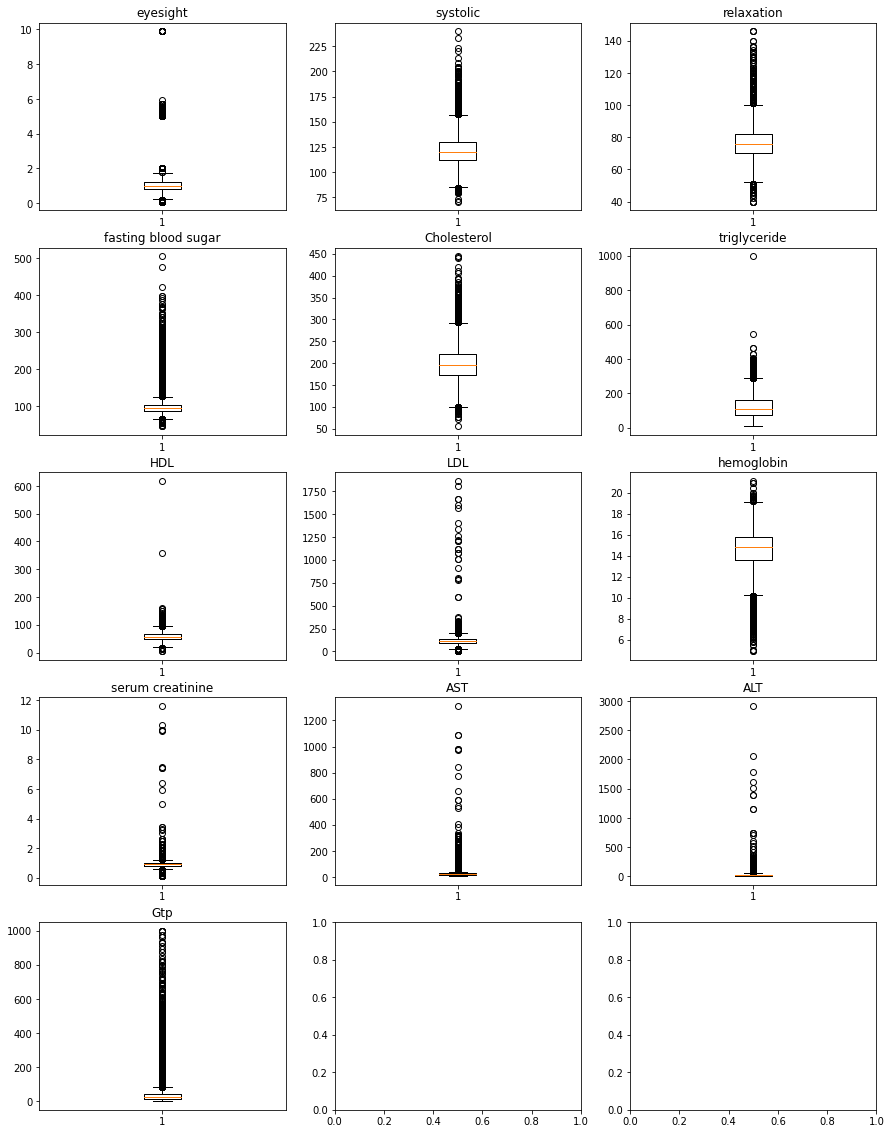

In [15]:
# Outlier 처리 전 boxplot (Outlier 분포 확인)

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(5, 3, figsize=(15, 20))

ax[0, 0].boxplot(df0['eyesight'])
ax[0, 0].set_title('eyesight')

ax[0, 1].boxplot(df0['systolic'])
ax[0, 1].set_title('systolic')

ax[0, 2].boxplot(df0['relaxation'])
ax[0, 2].set_title('relaxation')

ax[1, 0].boxplot(df0['fasting blood sugar'])
ax[1, 0].set_title('fasting blood sugar')

ax[1, 1].boxplot(df0['Cholesterol'])
ax[1, 1].set_title('Cholesterol')

ax[1, 2].boxplot(df0['triglyceride'])
ax[1, 2].set_title('triglyceride')

ax[2, 0].boxplot(df0['HDL'])
ax[2, 0].set_title('HDL')

ax[2, 1].boxplot(df0['LDL'])
ax[2, 1].set_title('LDL')

ax[2, 2].boxplot(df0['hemoglobin'])
ax[2, 2].set_title('hemoglobin')

ax[3, 0].boxplot(df0['serum creatinine'])
ax[3, 0].set_title('serum creatinine')

ax[3, 1].boxplot(df0['AST'])
ax[3, 1].set_title('AST')

ax[3, 2].boxplot(df0['ALT'])
ax[3, 2].set_title('ALT')

ax[4, 0].boxplot(df0['Gtp'])
ax[4, 0].set_title('Gtp')

plt.show()

In [16]:
# Outlier 제거

def drop_outlier(df, column, weight = 1.5):

  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = (quantile_75 - quantile_25) * weight

  lowest = quantile_25 - IQR
  highest = quantile_75 + IQR

  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest)].index

  df.drop(outlier_idx, axis = 0, inplace=True)


for i in range(3,16):
  drop_outlier(df, df.columns[i], weight = 1.5)

df.reset_index(drop = True,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


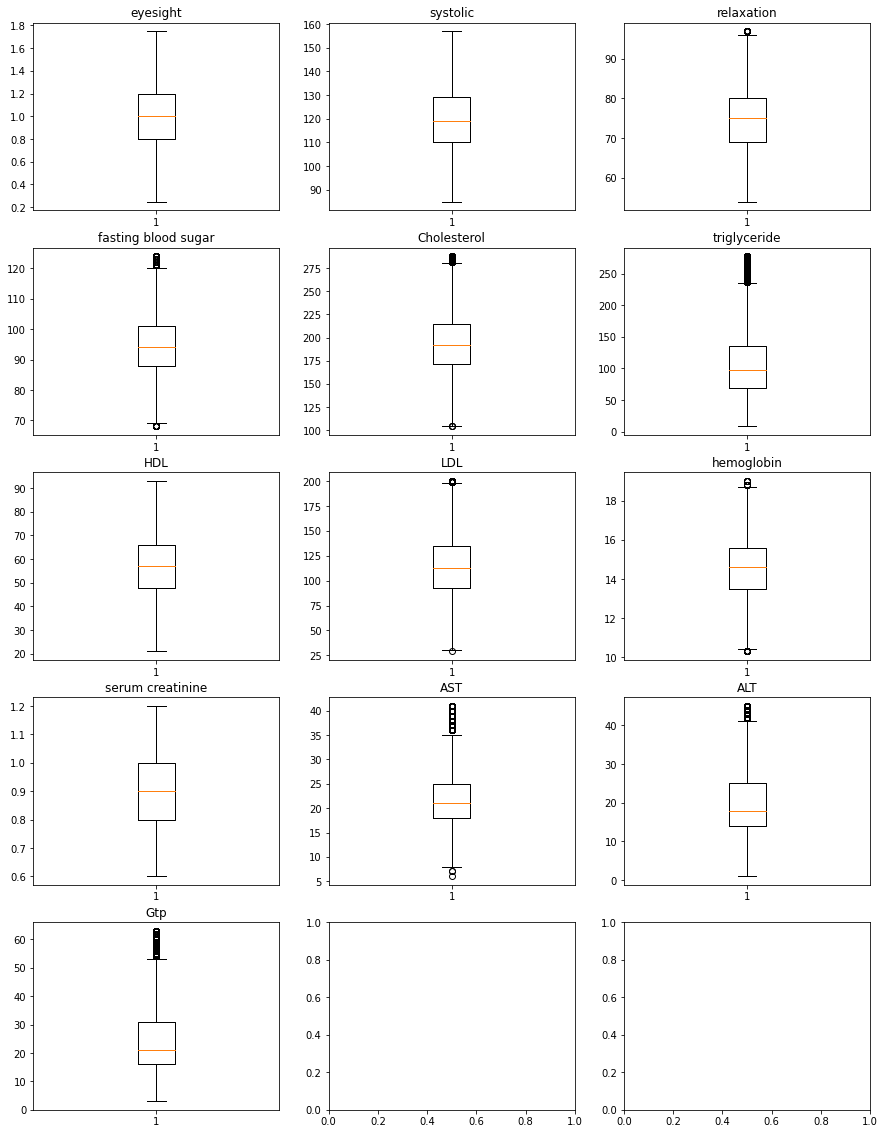

In [17]:
# Outlier 처리 후 boxplot

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(5, 3, figsize=(15, 20))
fig.set_facecolor('white')

ax[0, 0].boxplot(df['eyesight'])
ax[0, 0].set_title('eyesight')

ax[0, 1].boxplot(df['systolic'])
ax[0, 1].set_title('systolic')

ax[0, 2].boxplot(df['relaxation'])
ax[0, 2].set_title('relaxation')

ax[1, 0].boxplot(df['fasting blood sugar'])
ax[1, 0].set_title('fasting blood sugar')

ax[1, 1].boxplot(df['Cholesterol'])
ax[1, 1].set_title('Cholesterol')

ax[1, 2].boxplot(df['triglyceride'])
ax[1, 2].set_title('triglyceride')

ax[2, 0].boxplot(df['HDL'])
ax[2, 0].set_title('HDL')

ax[2, 1].boxplot(df['LDL'])
ax[2, 1].set_title('LDL')

ax[2, 2].boxplot(df['hemoglobin'])
ax[2, 2].set_title('hemoglobin')

ax[3, 0].boxplot(df['serum creatinine'])
ax[3, 0].set_title('serum creatinine')

ax[3, 1].boxplot(df['AST'])
ax[3, 1].set_title('AST')

ax[3, 2].boxplot(df['ALT'])
ax[3, 2].set_title('ALT')

ax[4, 0].boxplot(df['Gtp'])
ax[4, 0].set_title('Gtp')

plt.show()

In [18]:
df.shape

(35381, 20)

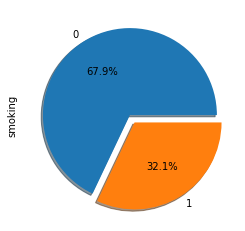

In [19]:
df['smoking'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

In [ ]:
profile = ProfileReport(df, minimal=True)
profile

# Modeling



1. train, val, test 분리
2. Feature, Target 분리
3. Baseline
4. [Pipeline 구축] TargetEncoder / SimpleImputer / RandomForestClassifier
5. [성능 검증] pipe.score / oob score / AUC score / ROC Curve
6. [최적의 파라미터 설정] RandomizedSearchCV
7. Column별 중요도를 찾아서 다시 Feature Engineering








In [21]:
# train, val, test 분리

from sklearn.model_selection import train_test_split

target = 'smoking'

train_val, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df[target], random_state=2)

train, val = train_test_split(train_val, train_size=0.80, test_size=0.20, 
                              stratify=train_val[target], random_state=2)


train.shape, val.shape, test.shape

((22643, 20), (5661, 20), (7077, 20))

In [22]:
# 특성과 타겟으로 분리

features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [23]:
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
# baseline

from sklearn.metrics import accuracy_score


major = y_train.mode()[0]
y_pred = [major] * len(y_train)
print("training accuracy: ", accuracy_score(y_train, y_pred))

y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

training accuracy:  0.6794594355871572
validation accuracy:  0.6793852676205617


In [25]:
# pipeline (랜덤포레스트)

pipe = make_pipeline(
        TargetEncoder(min_samples_leaf=1, smoothing=1), 
        SimpleImputer(), 
        RandomForestClassifier(n_jobs=-1,random_state=42, oob_score=True)
        )


pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.8132838721074015


In [26]:
from sklearn.metrics import f1_score

y_pred_train = pipe.predict(X_train)
y_pred_val = pipe.predict(X_val)
y_pred_test = pipe.predict(X_test)

print('훈련세트 정확도 : ', pipe.score(X_train, y_train))
print('검증세트 정확도 : ', pipe.score(X_val, y_val))
print('테스트세트 정확도 :', pipe.score(X_test, y_test))
print('--------------------------------------------')
print('훈련세트 F1-score : ', f1_score(y_train, y_pred_train))
print('검증세트 F1-score : ', f1_score(y_val, y_pred_val))
print('테스트세트 F1-score :', f1_score(y_test, y_pred_test))

훈련세트 정확도 :  1.0
검증세트 정확도 :  0.8132838721074015
테스트세트 정확도 : 0.8184258866751448
--------------------------------------------
훈련세트 F1-score :  1.0
검증세트 F1-score :  0.7040044805376646
테스트세트 F1-score : 0.7125922612390962


AUC score:  0.8970747755530055


Text(0, 0.5, 'TPR')

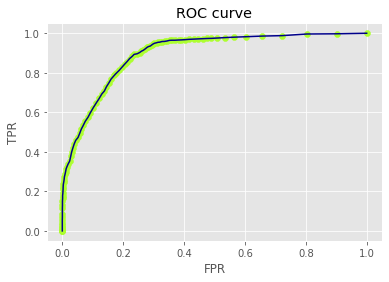

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = pipe.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.style.use('ggplot')

plt.scatter(fpr, tpr, color='greenyellow')
plt.plot(fpr, tpr, color='darkblue')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [28]:
# 최적의 파라미터 구하기
'''
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe_CV = make_pipeline( 
    TargetEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.],
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    pipe_CV, 
    param_distributions=dists, 
    n_iter=8, 
    cv=4, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);
'''

"\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint, uniform\n\npipe_CV = make_pipeline( \n    TargetEncoder(), \n    SimpleImputer(), \n    RandomForestClassifier(random_state=42)\n)\n\ndists = {\n    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.],\n    'targetencoder__min_samples_leaf': randint(1, 10),     \n    'randomforestclassifier__n_estimators': randint(50, 500), \n    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], \n    'randomforestclassifier__max_features': uniform(0, 1)\n}\n\nclf = RandomizedSearchCV(\n    pipe_CV, \n    param_distributions=dists, \n    n_iter=8, \n    cv=4, \n    scoring='f1',  \n    verbose=1,\n    n_jobs=-1\n)\n\nclf.fit(X_train, y_train);\n"

In [29]:
#print('최적 하이퍼파라미터: ', clf.best_params_)
#print('MAE: ', -clf.best_score_)

In [30]:
#pipe_best = clf.best_estimator_

In [31]:
#pipe_best.fit(X_train, y_train)
#print('검증 정확도: ', pipe_best.score(X_val, y_val))

In [32]:
#y_pred_proba = pipe_best.predict_proba(X_val)[:, -1]
#print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

In [33]:
# 파이프라인 랜덤포레스트

pipe_rf = make_pipeline(
    TargetEncoder(min_samples_leaf=5,
                  smoothing=50.0), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=42,
                           max_depth=None,
                           max_features=0.6127451630513946,
                           n_estimators=482,
                           oob_score=True
                           )
)

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['gender', 'tartar'], min_samples_leaf=5,
                               smoothing=50.0)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.6127451630513946,
                                        n_estimators=482, oob_score=True,
                                        random_state=42))])

In [34]:
from sklearn.metrics import f1_score

y_pred_train = pipe_rf.predict(X_train)
y_pred_val = pipe_rf.predict(X_val)
y_pred_test = pipe_rf.predict(X_test)

print('훈련세트 정확도 : ', pipe_rf.score(X_train, y_train))
print('검증세트 정확도 : ', pipe_rf.score(X_val, y_val))
print('테스트세트 정확도 :', pipe_rf.score(X_test, y_test))
print('--------------------------------------------')
print('훈련세트 F1-score : ', f1_score(y_train, y_pred_train))
print('검증세트 F1-score : ', f1_score(y_val, y_pred_val))
print('테스트세트 F1-score :', f1_score(y_test, y_pred_test))

훈련세트 정확도 :  1.0
검증세트 정확도 :  0.8233527645292351
테스트세트 정확도 : 0.8192737035467006
--------------------------------------------
훈련세트 F1-score :  1.0
검증세트 F1-score :  0.7234513274336284
테스트세트 F1-score : 0.7187156366835278


AUC score:  0.8994233212854684


Text(0, 0.5, 'TPR')

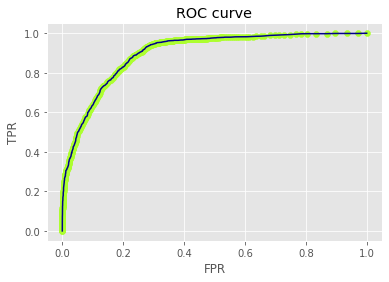

In [35]:
y_pred_proba = pipe_rf.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.style.use('ggplot')

plt.scatter(fpr, tpr, color='greenyellow')
plt.plot(fpr, tpr, color='darkblue')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

AUC score:  0.903603027934198


Text(0, 0.5, 'TPR')

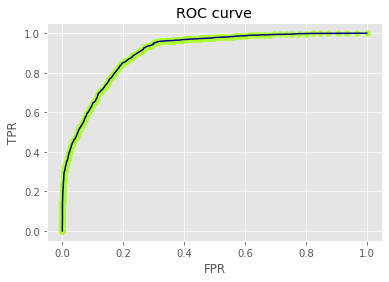

In [36]:
y_pred_test_proba = pipe_rf.predict_proba(X_test)[:, -1]
print('AUC score: ', roc_auc_score(y_test, y_pred_test_proba))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba)

plt.scatter(fpr, tpr, color='greenyellow')
plt.plot(fpr, tpr, color='darkblue')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [37]:
# 파이프라인 트리

from sklearn.tree import DecisionTreeClassifier

pipe_tr = make_pipeline(
    TargetEncoder(min_samples_leaf=5,
                  smoothing=50.0), 
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=2, 
                           max_depth=8, 
                           min_samples_leaf=20
                           )
                      
)

pipe_tr.fit(X_train, y_train)

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['gender', 'tartar'], min_samples_leaf=5,
                               smoothing=50.0)),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=8, min_samples_leaf=20,
                                        random_state=2))])

In [38]:
y_pred_train = pipe_tr.predict(X_train)
y_pred_val = pipe_tr.predict(X_val)
y_pred_test = pipe_tr.predict(X_test)

print('훈련세트 정확도 : ', pipe_tr.score(X_train, y_train))
print('검증세트 정확도 : ', pipe_tr.score(X_val, y_val))
print('테스트세트 정확도 :', pipe_tr.score(X_test, y_test))
print('--------------------------------------------')
print('훈련세트 F1-score : ', f1_score(y_train, y_pred_train))
print('검증세트 F1-score : ', f1_score(y_val, y_pred_val))
print('테스트세트 F1-score :', f1_score(y_test, y_pred_test))

훈련세트 정확도 :  0.772424148743541
검증세트 정확도 :  0.7396219749160926
테스트세트 정확도 : 0.7456549385332768
--------------------------------------------
훈련세트 F1-score :  0.6336295769640953
검증세트 F1-score :  0.579337899543379
테스트세트 F1-score : 0.5927601809954751


AUC score:  0.8162674110270196


Text(0, 0.5, 'TPR')

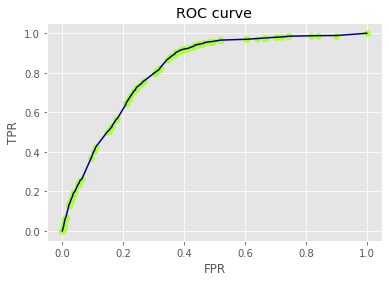

In [39]:
y_pred_proba = pipe_tr.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.style.use('ggplot')

plt.scatter(fpr, tpr, color='greenyellow')
plt.plot(fpr, tpr, color='darkblue')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [40]:
# 파이프라인 xgb

from xgboost import XGBClassifier

pipe_xgb = make_pipeline(
    TargetEncoder(min_samples_leaf=5,
                  smoothing=50.0), 
    SimpleImputer(), 
    XGBClassifier(
        n_estimators=100,
        verbosity=0,
        random_state=2, 
        n_jobs=-1,
        max_depth=7,
        learning_rate=0.2
        )
                      
)

pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['gender', 'tartar'], min_samples_leaf=5,
                               smoothing=50.0)),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(learning_rate=0.2, max_depth=7, n_jobs=-1,
                               random_state=2, verbosity=0))])

In [41]:
y_pred_train = pipe_xgb.predict(X_train)
y_pred_val = pipe_xgb.predict(X_val)
y_pred_test = pipe_xgb.predict(X_test)

print('훈련세트 정확도 : ', pipe_xgb.score(X_train, y_train))
print('검증세트 정확도 : ', pipe_xgb.score(X_val, y_val))
print('테스트세트 정확도 :', pipe_xgb.score(X_test, y_test))
print('--------------------------------------------')
print('훈련세트 F1-score : ', f1_score(y_train, y_pred_train))
print('검증세트 F1-score : ', f1_score(y_val, y_pred_val))
print('테스트세트 F1-score :', f1_score(y_test, y_pred_test))

훈련세트 정확도 :  0.9216534911451663
검증세트 정확도 :  0.7910263204380852
테스트세트 정확도 : 0.7992087042532147
--------------------------------------------
훈련세트 F1-score :  0.8777226357871518
검증세트 F1-score :  0.6727524204702627
테스트세트 F1-score : 0.68568900685689


AUC score:  0.8643302977298155


Text(0, 0.5, 'TPR')

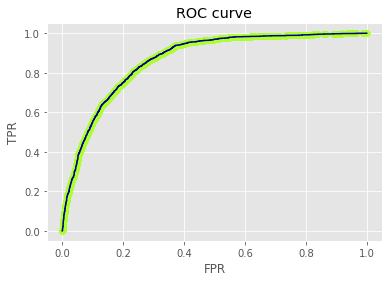

In [42]:
y_pred_proba = pipe_xgb.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.style.use('ggplot')

plt.scatter(fpr, tpr, color='greenyellow')
plt.plot(fpr, tpr, color='darkblue')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

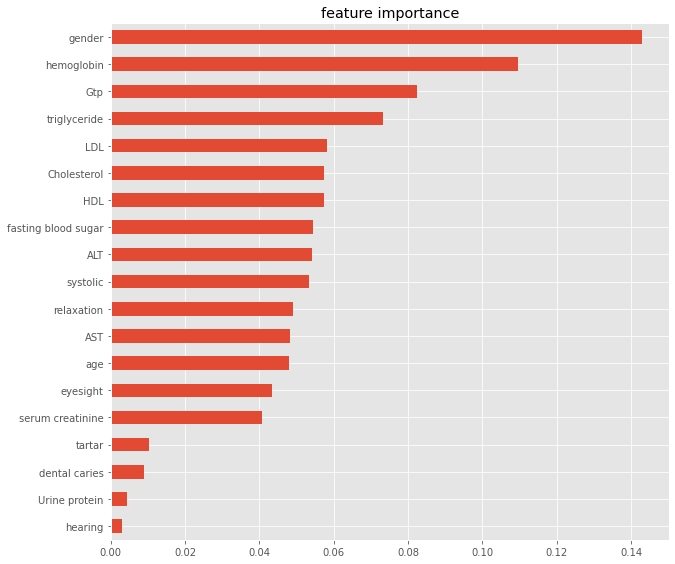

In [43]:
rf = pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 19
plt.figure(figsize=(10,n/2))
plt.title('feature importance')
importances.sort_values()[-n:].plot.barh();

In [44]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 216 kB 10.5 MB/s 
     |████████████████████████████████| 133 kB 53.3 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=1090319004cd73334be289218c688da2a13a5a34aca8b10481ad2804ff1056c3
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [45]:
from sklearn.pipeline import Pipeline

pipe_p = Pipeline([
    ('preprocessing', TargetEncoder(min_samples_leaf=5, smoothing=50.0)),
    ('rf', RandomForestClassifier(random_state=42,
                           max_depth=None,
                           max_features=0.6127451630513946,
                           n_estimators=482)
    )
])

pipe_p.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 TargetEncoder(cols=['gender', 'tartar'], min_samples_leaf=5,
                               smoothing=50.0)),
                ('rf',
                 RandomForestClassifier(max_features=0.6127451630513946,
                                        n_estimators=482, random_state=42))])

In [46]:
permuter = PermutationImportance(pipe_p.named_steps['rf'],
                                scoring='accuracy',
                                n_iter=5,
                                random_state=2,
                                )

X_val_transformed = pipe_p.named_steps['preprocessing'].transform(X_val)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(estimator=RandomForestClassifier(max_features=0.6127451630513946,
                                                       n_estimators=482,
                                                       random_state=42),
                      random_state=2, scoring='accuracy')

In [47]:
# 변수 중요도

feature_names = df.columns[:-1].tolist()

eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names
    )

Weight,Feature
0.1577 ± 0.0095,gender
0.0639 ± 0.0054,Gtp
0.0321 ± 0.0103,triglyceride
0.0252 ± 0.0085,age
0.0225 ± 0.0069,ALT
0.0166 ± 0.0059,hemoglobin
0.0084 ± 0.0029,AST
0.0084 ± 0.0054,serum creatinine
0.0078 ± 0.0034,systolic
0.0070 ± 0.0030,tartar
